! pip install numpy
! pip install pandas
! pip install matplotlib
! pip install seaborn

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from models import *

In [16]:
df = pd.read_csv('dane.data', sep='\t', names=[f'x{i}' for i in range(1, 7)]+['y'])

def partition(df, frac, seed=1234):
    assert 0 < frac < 1
    df_train = df.sample(frac=frac, random_state=seed)
    df_test = df.drop(df_train.index)
    return df_train, df_test

df_train, df_test = partition(df, 6/10)
df_valid, df_test = partition(df_test, 1/2)
print("train: ", df_train.shape)
print("validate: ", df_valid.shape)
print("test: ", df_test.shape)

train:  (1199, 7)
validate:  (400, 7)
test:  (400, 7)


In [32]:
class MinMaxScaler:
    def __init__(self, A):
        self.shift = A.min(axis=0)
        self.factor = A.max(axis=0)-A.min(axis=0)

    def scale(self, A):
        return (A-self.shift)/self.factor

def scale(df, scaler):
    df_scaled = scaler.scale(df.drop('y', axis=1))
    df_scaled['y'] = df['y']
    return df_scaled

scaler = MinMaxScaler(df_train.drop('y', axis=1))
df_train = scale(df_train, scaler)
df_valid = scale(df_valid, scaler)
df_test = scale(df_test, scaler)
df_train.head()

,sin_x1,sin_x6,x1,x1^2,x1^3,x1^8,x1^9,x2,x2^2,x2^3,...,x5^2,x5^3,x5^8,x5^9,x6,x6^2,x6^3,x6^8,x6^9,y
547,0.431758,0.261211,0.260870,0.068053,0.017753,0.000021,0.000006,0.000000,0.000000,0.000000,...,0.197531,0.087791,0.001522,0.000677,0.789474,0.623269,0.492054,1.509042e-01,1.191349e-01,452.01
593,0.183719,0.986361,0.304348,0.092628,0.028191,0.000074,0.000022,0.103448,0.010702,0.001107,...,0.049383,0.010974,0.000006,0.000001,0.105263,0.011080,0.001166,1.507340e-08,1.586673e-09,246.09
444,0.699666,0.000000,0.217391,0.047259,0.010274,0.000005,0.000001,0.103448,0.010702,0.001107,...,0.049383,0.010974,0.000006,0.000001,0.368421,0.135734,0.050007,3.394341e-04,1.250547e-04,551.42
1730,0.000000,0.920018,0.869565,0.756144,0.657516,0.326902,0.284262,0.448276,0.200951,0.090082,...,0.197531,0.087791,0.001522,0.000677,0.578947,0.335180,0.194052,1.262155e-02,7.307213e-03,179.86
1815,0.055020,0.261211,0.913043,0.833648,0.761157,0.482983,0.440984,0.103448,0.010702,0.001107,...,0.049383,0.010974,0.000006,0.000001,0.789474,0.623269,0.492054,1.509042e-01,1.191349e-01,17.69


In [20]:
# df = pd.read_csv('dane_skalowane.data', sep='\t', names=[f'x{i}' for i in range(1, 7)]+['y'])

# df['sin_x1'] = np.sin( 4*np.pi* df[f'x1'])
# df['sin_x6'] = np.sin( 4*np.pi* df[f'x6'])
# for i in range(1,7):
#     for j in [2,3,4,5,6,7,8,9]:
#         df[f'x{i}^{j}']=df[f'x{i}']**j
#     for j in range(i+1,7):
#         df[f'x{i}*{j}']=df[f'x{i}']*df[f'x{j}']
def add_features(df):
    df['sin_x1'] = np.sin( 4*np.pi* df[f'x1'])
    df['sin_x6'] = np.sin( 4*np.pi* df[f'x6'])
    for i in range(1,7):
        for j in [2,3,8,9]:
            df[f'x{i}^{j}']=df[f'x{i}']**j
            
add_features(df_train)
add_features(df_valid)
add_features(df_test)
df_train.head()

,sin_x1,sin_x6,x1,x1^2,x1^3,x1^8,x1^9,x2,x2^2,x2^3,...,x5^2,x5^3,x5^8,x5^9,x6,x6^2,x6^3,x6^8,x6^9,y
547,-0.136167,-0.475947,0.260870,0.068053,0.017753,0.000021,0.000006,0.000000,0.000000,0.000000,...,0.197531,0.087791,0.001522,0.000677,0.789474,0.623269,0.492054,1.509042e-01,1.191349e-01,452.01
593,-0.631088,0.969400,0.304348,0.092628,0.028191,0.000074,0.000022,0.103448,0.010702,0.001107,...,0.049383,0.010974,0.000006,0.000001,0.105263,0.011080,0.001166,1.507340e-08,1.586673e-09,246.09
444,0.398401,-0.996584,0.217391,0.047259,0.010274,0.000005,0.000001,0.103448,0.010702,0.001107,...,0.049383,0.010974,0.000006,0.000001,0.368421,0.135734,0.050007,3.394341e-04,1.250547e-04,551.42
1730,-0.997669,0.837166,0.869565,0.756144,0.657516,0.326902,0.284262,0.448276,0.200951,0.090082,...,0.197531,0.087791,0.001522,0.000677,0.578947,0.335180,0.194052,1.262155e-02,7.307213e-03,179.86
1815,-0.887885,-0.475947,0.913043,0.833648,0.761157,0.482983,0.440984,0.103448,0.010702,0.001107,...,0.049383,0.010974,0.000006,0.000001,0.789474,0.623269,0.492054,1.509042e-01,1.191349e-01,17.69


In [34]:
def get_data(df):
    y = df['y'].to_numpy()
    y = y.reshape([y.shape[0], 1])

    X = df.drop('y', axis=1)
    X.insert(0, 'x0', [1] * df.shape[0])
    X = X.to_numpy()

    return X, y

train_X, train_y = get_data(df_train)
valid_X, valid_y = get_data(df_valid)
test_X, test_y = get_data(df_test)
train_X.shape, train_y.shape

((1199, 33), (1199, 1))

<Axes: xlabel='x1', ylabel='y'>

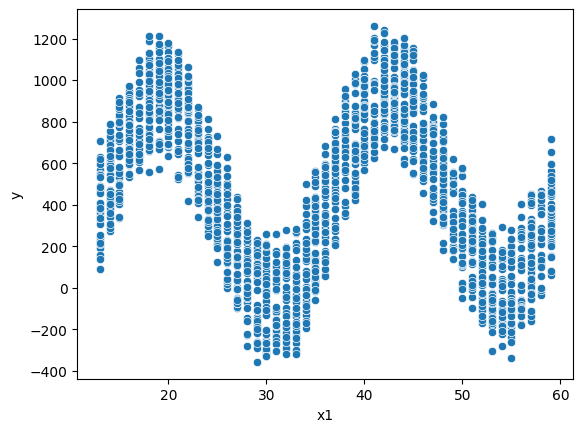

In [22]:
sns.scatterplot(df, x='x1', y='y')

<Axes: xlabel='sin_x1', ylabel='y'>

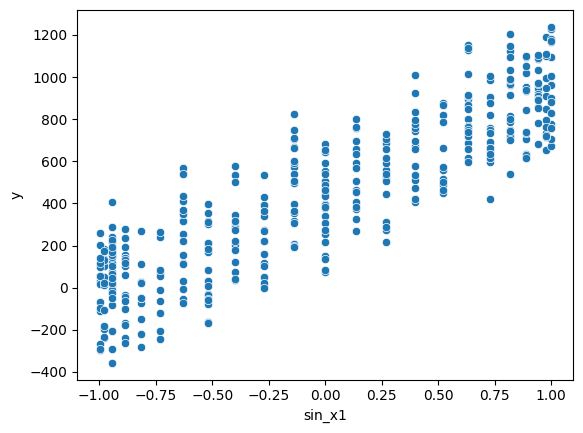

In [23]:
sns.scatterplot(df_valid, x='sin_x1', y='y')

In [73]:
def plot(model, thetas, X, y, label=''):
    step = len(thetas) // 100
    epochs = [ep for ep in range(0, len(thetas), step)] + [len(thetas)-1]
    loses = [model.mse(y, model.pred(X, theta), theta) for theta in thetas[::step]] + [model.mse(y, model.pred(X, thetas[-1]), thetas[-1])]
    data = {'epoch': epochs[2:], 'loss': loses[2:]}
    sns.lineplot(data=pd.DataFrame(data), x='epoch', y='loss', label=f'{label}: {np.round(loses[-1],2)}')
    
    px = [int(len(thetas) * x)-1 for x in [0.01, 0.02, 0.03, 0.125, 0.625, 1]]
    py = [model.mse(y, model.pred(X, thetas[x]), thetas[x]) for x in px]
    plt.scatter(x=px, y=py)

## Least Squares + No Regularization

In [70]:
ls_model = LeastSquaresModel(train_X, train_y)

In [71]:
thetas, loss = ls_model.train(10000, step_size=0.2)
print(f'theta:\t{np.reshape(np.round(thetas[-1],2), thetas[-1].shape[0])})')
print(f'loss:\t{loss}')
%time

theta:	[-2.7033e+02  9.7900e+02  3.6932e+02 -1.8156e+02  1.2396e+02  4.4556e+02
 -2.1359e+02 -3.0040e+02  6.2990e+01  7.6300e+00 -5.5700e+00 -1.1000e-01
 -2.9000e+00  1.1060e+01 -1.3670e+01  8.3600e+00 -0.0000e+00 -2.4400e+00
 -2.6416e+02  1.2676e+02  1.9499e+02 -6.8800e+00 -2.9760e+01  3.5170e+01
 -9.1360e+01 -6.8670e+01  9.6200e+00  5.6700e+00  2.9809e+02 -6.9200e+01
 -2.1310e+01 -1.9430e+02 -1.6755e+02])
loss:	2366.8731567918867
CPU times: user 19 µs, sys: 57 µs, total: 76 µs
Wall time: 9.06 µs


In [38]:
ls_model.analytical()
theta,loss = ls_model.analytical()
print(f'theta:\t{np.reshape(np.round(theta,2), theta.shape[0])}')
print(f'loss:\t{loss}')
%time

theta:	[   296.53    449.38    149.04   1685.97  -8213.59  10234.3  -19566.08
  15867.99     91.27    -99.23     92.92   -150.47    127.38     42.12
   -235.41    301.39   -655.68    546.9    -355.83    483.42   -183.09
    487.99   -408.55     20.37    -30.11   -121.96     68.1     -42.69
   1743.79  -6721.45   7879.64 -15920.01  12937.3 ]
loss:	504.2780147572581
CPU times: user 16 µs, sys: 26 µs, total: 42 µs
Wall time: 5.01 µs


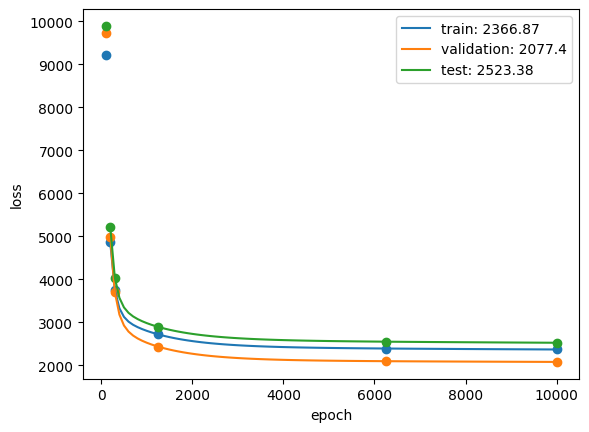

In [74]:
plot(ls_model, thetas, train_X, train_y, label='train')
plot(ls_model, thetas, valid_X, valid_y, label='validation')
plot(ls_model, thetas, test_X, test_y, label='test')

## Least Squares + Ridge Regularization

In [101]:
rls_model = RidgeLSModel(train_X, train_y, 0.00000001)

In [102]:
thetas, loss = rls_model.train(10000, step_size=0.2)
print(f'theta:\t{np.reshape(np.round(thetas[-1],2), thetas[-1].shape[0])})')
print(f'loss:\t{loss}')
%time

theta:	[-2.7033e+02  9.7900e+02  3.6932e+02 -1.8156e+02  1.2396e+02  4.4556e+02
 -2.1359e+02 -3.0040e+02  6.2990e+01  7.6300e+00 -5.5700e+00 -1.1000e-01
 -2.9000e+00  1.1060e+01 -1.3670e+01  8.3600e+00 -0.0000e+00 -2.4400e+00
 -2.6416e+02  1.2676e+02  1.9499e+02 -6.8800e+00 -2.9750e+01  3.5170e+01
 -9.1360e+01 -6.8670e+01  9.6200e+00  5.6700e+00  2.9809e+02 -6.9200e+01
 -2.1310e+01 -1.9430e+02 -1.6755e+02])
loss:	2366.8921101576716
CPU times: user 19 µs, sys: 58 µs, total: 77 µs
Wall time: 9.06 µs


In [103]:
theta, loss = rls_model.analytical()
print(f'theta:\t{np.reshape(np.round(theta,2), theta.shape[0])})')
print(f'loss:\t{loss}')
%time

theta:	[  -300.34    896.67    297.07   1685.96  -8213.54  10234.24 -19565.93
  15867.87     91.27    -99.23     92.92   -150.47    127.38     42.12
   -235.41    301.39   -655.68    546.9    -355.83    483.42   -183.08
    487.98   -408.55     20.37    -30.12   -121.96     68.1     -42.69
   1743.79  -6721.41   7879.59 -15919.9   12937.21])
loss:	517.7123766032438
CPU times: user 9 µs, sys: 30 µs, total: 39 µs
Wall time: 4.77 µs


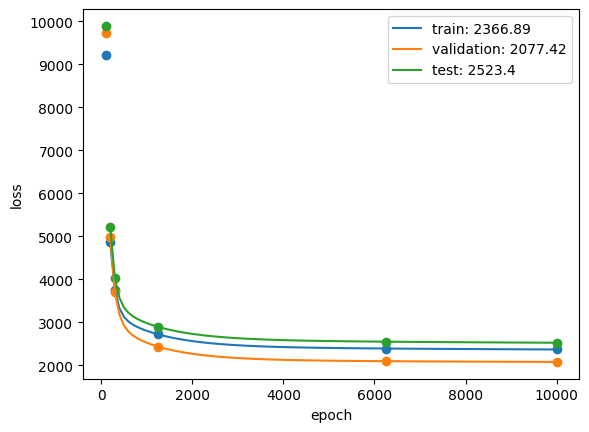

In [104]:
plot(rls_model, thetas, train_X, train_y, label='train')
plot(rls_model, thetas, valid_X, valid_y, label='validation')
plot(rls_model, thetas, test_X, test_y, label='test')

## Least Squares + Lasso Regularization

In [80]:
lls_model = LassoLSModel(train_X, train_y, 0.000001)

In [81]:
thetas, loss = lls_model.train(5000, step_size=0.2)
print(f'theta:\t{np.reshape(np.round(theta,2), theta.shape[0])})')
print(f'loss:\t{loss}')
%time

theta:	[  -300.34    896.67    297.07   1685.88  -8213.1   10233.68 -19564.61
  15866.74     91.27    -99.22     92.91   -150.45    127.36     42.12
   -235.4     301.39   -655.65    546.87   -355.83    483.4    -183.05
    487.91   -408.49     20.37    -30.13   -121.96     68.12    -42.7
   1743.72  -6721.07   7879.15 -15918.91  12936.38])
loss:	2403.0486532752343
CPU times: user 20 µs, sys: 61 µs, total: 81 µs
Wall time: 9.3 µs


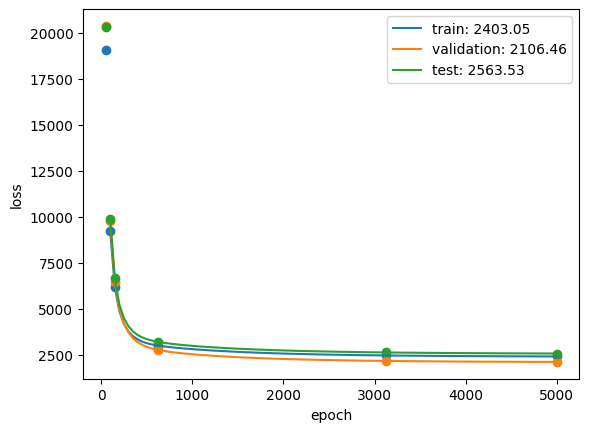

In [82]:
plot(lls_model, thetas, train_X, train_y, label='train')
plot(lls_model, thetas, valid_X, valid_y, label='validation')
plot(lls_model, thetas, test_X, test_y, label='test')

## Elastic Net

In [ ]:
els_model = ElasticLSModel(train_X, train_y, 0.000001, 0.000001)

In [ ]:
thetas, loss = els_model.train(10000, step_size=0.2)
print(f'theta:\t{np.reshape(np.round(theta,2), theta.shape[0])})')
print(f'loss:\t{loss}')
%time

In [ ]:
plot(els_model, thetas, train_X, train_y, label='train')
plot(els_model, thetas, valid_X, valid_y, label='validation')
plot(els_model, thetas, test_X, test_y, label='test')